In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

# DF of article

In [78]:
article = pd.read_csv('irars_dataset/article.csv')

In [79]:
article.shape

(152045, 7)

In [80]:
article.head(2)

,article_id,eid,aggregationType,abstract,title,doi,keywords
0,0,2-s2.0-85118364968,Journal,© 1995-2012 IEEE.This article introduces a nov...,Towards Automatic Skeleton Extraction with Ske...,10.1109/TVCG.2020.3003994,"[shape matching,Skeleton extraction,skeleton m..."
1,1,2-s2.0-85099854147,Journal,© Universiti Putra Malaysia PressThe implement...,Fintech in Malaysia: An appraisal to the need ...,10.47836/PJSSH.28.4.40,"[Shariah-compliant regulation,Malaysia,Islamic..."


In [81]:
article.columns

Index(['article_id', 'eid', 'aggregationType', 'abstract', 'title', 'doi',
       'keywords'],
      dtype='object')

In [82]:
article = article[['article_id','doi','title','abstract', 'keywords']]

In [83]:
article.head(2)

,article_id,doi,title,abstract,keywords
0,0,10.1109/TVCG.2020.3003994,Towards Automatic Skeleton Extraction with Ske...,© 1995-2012 IEEE.This article introduces a nov...,"[shape matching,Skeleton extraction,skeleton m..."
1,1,10.47836/PJSSH.28.4.40,Fintech in Malaysia: An appraisal to the need ...,© Universiti Putra Malaysia PressThe implement...,"[Shariah-compliant regulation,Malaysia,Islamic..."


In [84]:
article.isna().sum()

article_id       0
doi           3605
title           30
abstract      6326
keywords         0
dtype: int64

In [85]:
article.dropna(inplace=True)

In [86]:
# this somehow does not detect duplicates in the abstract column
article.duplicated().sum()

0

In [87]:
article.shape

(142560, 5)

# DF of article citation network

In [88]:
citation_network = pd.read_csv('irars_dataset/article_cite.csv')

In [89]:
citation_network.head(2)

,article_id,cited_article_id
0,14,52078
1,27,61739


In [90]:
citation_network.rename(columns={
    "cited_article_id":"cited_by_article_id"
}, inplace=True)

In [91]:
citation_network.head(1)

,article_id,cited_by_article_id
0,14,52078


In [92]:
citation_network.isna().sum()

article_id             0
cited_by_article_id    0
dtype: int64

In [93]:
citation_network.duplicated().sum()

0

# DF of author information

Combine author excel files together

In [94]:
author = pd.read_csv('irars_dataset/author_1.csv')

In [95]:
# import os
# folder_path = r'C:\Users\limsi\OneDrive\Desktop\FYP Prototype 2\irars_dataset'

# df_list = []

# for i in range(1, 6):
#     file_name = f"author_{i}.csv"
#     file_path = os.path.join(folder_path, file_name)
#     if os.path.isfile(file_path):
#         df = pd.read_csv(file_path)
#         df_list.append(df)

# combined_df = pd.concat(df_list, ignore_index=True)
# combined_df.to_csv('author_list.csv', index=False)


In [96]:
author = pd.read_csv('author_list.csv')

In [97]:
author.shape

(45453, 21)

In [98]:
author.head(2)

,author_id,latestAffiliatedInstitution_name,eid,authorId,preferredName_first,preferredName_last,preferredName_full,documentCount,coAuthorsCount,citationsCount,...,emailAddress,nameVariants,hindex,links,citedByCount,latestAffiliatedInstitution_id,latestAffiliatedInstitution_address_city,latestAffiliatedInstitution_address_state,latestAffiliatedInstitution_address_country,latestAffiliatedInstitution_links
0,2,Multimedia University,9-s2.0-57221693981,57221693981,Muhammad Ilyas Ab,Razak,"Razak, Muhammad Ilyas Ab",1,3,0,...,muhammadilyas2101@gmail.com,"[{""first"": ""Muhammad Ilyas Ab"", ""last"": ""Razak...",0,"[{""rel"": ""self"", ""type"": ""GET"", ""href"": ""https...",0,60012005.0,Selangor,Selangor,Malaysia,"[{""rel"": ""self"", ""type"": ""GET"", ""href"": ""https..."
1,3,Multimedia University,9-s2.0-57221697039,57221697039,Nur Akma Mohd,Dali,"Dali, Nur Akma Mohd",1,3,0,...,nurakma.dali@mmu.edu.my,"[{""first"": ""Nur Akma Mohd"", ""last"": ""Dali"", ""f...",0,"[{""rel"": ""self"", ""type"": ""GET"", ""href"": ""https...",0,60012005.0,Selangor,Selangor,Malaysia,"[{""rel"": ""self"", ""type"": ""GET"", ""href"": ""https..."


In [99]:
author.isna().sum()

author_id                                          0
latestAffiliatedInstitution_name                 145
eid                                                0
authorId                                           0
preferredName_first                               69
preferredName_last                                 4
preferredName_full                                 4
documentCount                                      0
coAuthorsCount                                     0
citationsCount                                     0
publishedSubjectAreas                              0
emailAddress                                    6659
nameVariants                                       0
hindex                                             0
links                                              0
citedByCount                                       0
latestAffiliatedInstitution_id                   145
latestAffiliatedInstitution_address_city         590
latestAffiliatedInstitution_address_state     

Don't need to drop, since NA values are only in non-important data columns

In [100]:
author.duplicated().sum()

0

In [101]:
author=author[['author_id', 'latestAffiliatedInstitution_name']]


In [102]:
author.rename(columns={
    'latestAffiliatedInstitution_name':'Institution'
}, inplace=True)

In [103]:
author.head()

,author_id,Institution
0,2,Multimedia University
1,3,Multimedia University
2,4,Multimedia University
3,5,Multimedia University
4,6,Uniwersytet Jagielloński


# Find total citations per article_id

In [104]:
print(article.shape)
print(citation_network.shape)
print(author.shape)

(142560, 5)
(222121, 2)
(45453, 2)


In [105]:
citation_network['article_id'].value_counts()

article_id
61365     109
60996      86
58531      85
58886      82
16088      79
         ... 
494577      1
494544      1
494542      1
494525      1
995863      1
Name: count, Length: 144014, dtype: int64

This means all article ids are unique, now we find citations per article 

In [106]:
citations_frequency_for_papers = citation_network['article_id'].value_counts()

In [107]:
citations_frequency_for_papers.unique()

array([109,  86,  85,  82,  79,  77,  71,  69,  68,  63,  61,  58,  55,
        54,  53,  50,  49,  48,  46,  45,  43,  42,  41,  40,  39,  38,
        37,  36,  35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,
        24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,
        11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1], dtype=int64)

In [108]:
citations_frequency_for_papers.unique().shape

(63,)

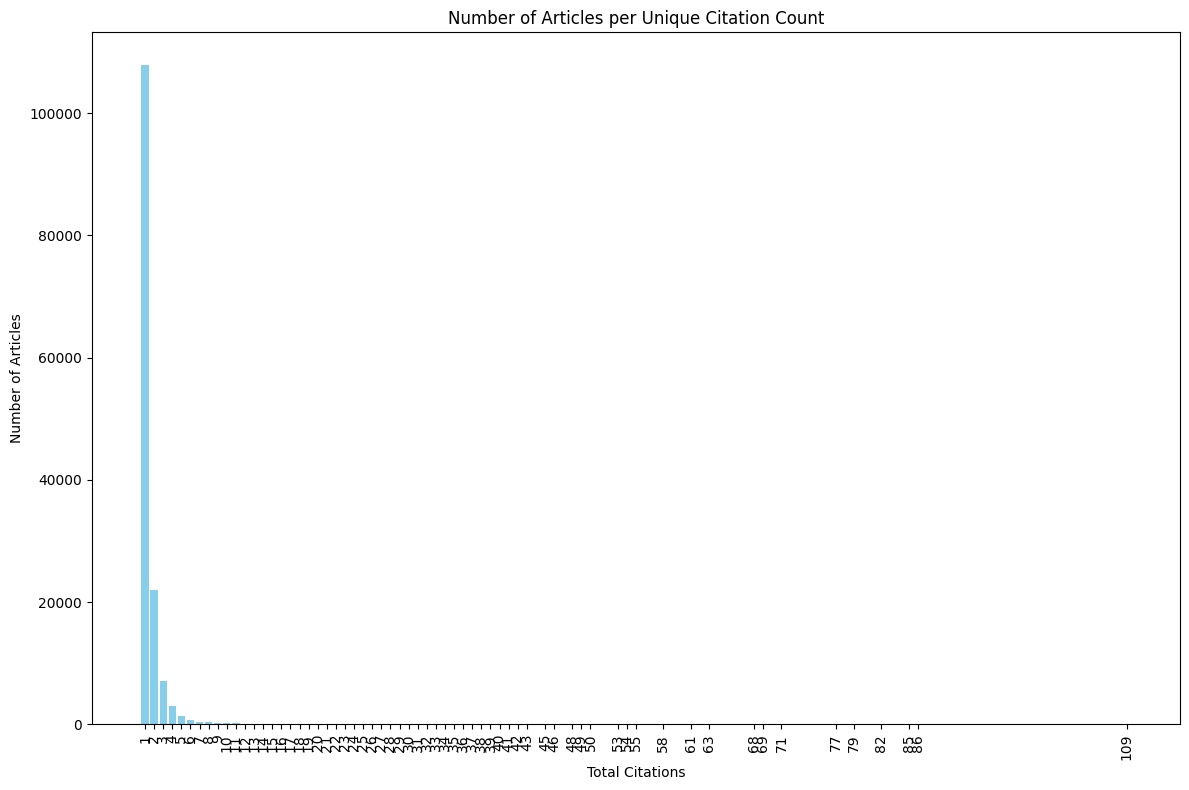

In [109]:


# Calculate the frequency of each unique citation count
unique_counts, freq = np.unique(citations_frequency_for_papers, return_counts=True)

# Plotting the data
plt.figure(figsize=(12, 8))
plt.bar(unique_counts, freq, color='skyblue')
plt.xlabel('Total Citations')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Unique Citation Count')
plt.xticks(unique_counts, rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [110]:
unique_counts, freq = np.unique(citations_frequency_for_papers, return_counts=True)

sum_frequency = []
for count, frequency in zip(unique_counts, freq):
    print(f"{count} citations: {frequency} articles")
    sum_frequency.append(frequency)
    
print("")
print(f"total frequency is {sum(sum_frequency)}")


1 citations: 107834 articles
2 citations: 21920 articles
3 citations: 7129 articles
4 citations: 3033 articles
5 citations: 1381 articles
6 citations: 734 articles
7 citations: 426 articles
8 citations: 333 articles
9 citations: 209 articles
10 citations: 142 articles
11 citations: 138 articles
12 citations: 100 articles
13 citations: 81 articles
14 citations: 69 articles
15 citations: 42 articles
16 citations: 40 articles
17 citations: 54 articles
18 citations: 43 articles
19 citations: 26 articles
20 citations: 40 articles
21 citations: 21 articles
22 citations: 18 articles
23 citations: 22 articles
24 citations: 18 articles
25 citations: 13 articles
26 citations: 17 articles
27 citations: 15 articles
28 citations: 9 articles
29 citations: 8 articles
30 citations: 9 articles
31 citations: 9 articles
32 citations: 8 articles
33 citations: 5 articles
34 citations: 5 articles
35 citations: 5 articles
36 citations: 4 articles
37 citations: 3 articles
38 citations: 3 articles
39 citations

Insights:

- Out of all 144014 data rows, 107834 articles have 1 citation. Which is a large portion of the whole dataset. Leave it for now


In [111]:
# Count the total occurrences of each article_id
article_id_citations = citation_network['article_id'].value_counts().reset_index()

# Rename the columns for clarity
article_id_citations.columns = ['article_id', 'total_citations']


article_id_citations.head()

,article_id,total_citations
0,61365,109
1,60996,86
2,58531,85
3,58886,82
4,16088,79


# Merge them into our final training dataset

In [112]:
article_with_citations = article_id_citations.merge(article, on="article_id")

In [113]:
article_with_citations.head(1)

,article_id,total_citations,doi,title,abstract,keywords
0,61365,109,10.1007/s10462-021-09973-3,Systematic reviews in sentiment analysis: a te...,"© 2021, The Author(s).With advanced digitalisa...","[Tertiary study,Sentiment classification,Syste..."


In [114]:
author.head(1)

,author_id,Institution
0,2,Multimedia University


In [115]:
write_history = pd.read_csv('irars_dataset/author_write.csv')

In [116]:
write_history.head(1)

,author_id,article_id
0,2,1


In [117]:
author_to_article = author.merge(write_history, on="author_id")

In [118]:
author_to_article.head(2)

,author_id,Institution,article_id
0,2,Multimedia University,1
1,3,Multimedia University,1


In [119]:
final_training_table = author_to_article.merge(article_with_citations, on="article_id")

In [120]:
final_training_table.head(2)

,author_id,Institution,article_id,total_citations,doi,title,abstract,keywords
0,6,Uniwersytet Jagielloński,827305,1,10.34105/j.kmel.2021.13.016,Effects of synchronized and asynchronized e-fe...,© 2021 Hong Kong Bao Long Accounting And Secre...,"[Synchronized e-feedback interaction,Asynchron..."
1,7,Universität zu Lübeck,149492,1,10.3390/app11114927,Short-term load forecasting using an attended ...,"© 2021 by the authors. Licensee MDPI, Basel, S...","[Encoder decoder,Recurrent neural network,Shor..."


# Final Cleaning Processes for Abstract 

In [121]:
# Function to remove © and any following year or range of years
def clean_text(text):
    # Define the regex pattern
    # pattern = r'©(?:\s\d{4}(?:-\d{4})?[,]?)?|IEEE\.|The Author\(s\)\.?|The Authors\.?|by the authors\. Licensee MDPI, Basel, Switzerland\.|Elsevier Ltd|Elsevier B\.V\.|, under exclusive licence to Springer-Verlag GmbH Germany, part of Springer Nature|John Wiley & Sons Ltd|ERP Environment and John Wiley & Sons Ltd\.|Emerald Publishing Limited\.|by the author\. Licensee MDPI, Basel, Switzerland\.|by the authors\.|Taylor & Francis Group, LLC\.|MDPI AG\. All rights reserved\.|Springer Nature Singapore Pte Ltd\.|IOP Publishing Ltd|THE AUTHORS|, under exclusive licence to Springer Nature|Springer-Verlag GmbH Germany, part of Springer Nature\.|Islamic Azad University \(IAU\)\.|WITPress\. All rights reserved\.|Published by Informa UK Limited, trading as Taylor & Francis Group\.|Informa UK Limited, trading as Taylor & Francis Group\.|, under exclusive licence to Springer-Verlag London Ltd., part of Springer Nature\.|, under exclusive licence to Springer-Verlag GmbH, DE part of Springer Nature\.|Springer-Verlag GmbH Austria, part of Springer\.|, under exclusive licence to Springer-Verlag GmbH Austria, part of Springer Nature\.|Hai Tao et al\.|, under exclusive licence to Springer-Verlag London Ltd part of Springer Nature\.|John Wiley & Sons, Ltd\.|Copyright  Arabameri, Lee, Rezaie, Chandra Pal, Asadi Nalivan, Saha, Chowdhuri and Moayedi\.|Springer Nature BV\.|Copyright  Kumar, Khan, Din, Band, Mosavi and Ibeke\.|by the authorsLicensee MDPI, Basel, Switzerland\.|, under exclusive licence to Springer Science\+Business Media, LLC, part of Springer Nature\.|Elsevier GmbH\.|\.'
    # pattern = r'©(?:\s\d{4}(?:-\d{4})?[,]?)?|IEEE\.|The Author\(s\)\.?|The Authors\.?|by the authors\. Licensee MDPI, Basel, Switzerland\.|Elsevier Ltd|Elsevier B\.V\.|, under exclusive licence to Springer-Verlag GmbH Germany, part of Springer Nature|John Wiley & Sons Ltd|ERP Environment and John Wiley & Sons Ltd\.|Emerald Publishing Limited\.|by the author\. Licensee MDPI, Basel, Switzerland\.|by the authors\.|Taylor & Francis Group, LLC\.|MDPI AG\. All rights reserved\.|Springer Nature Singapore Pte Ltd\.|IOP Publishing Ltd|THE AUTHORS|, under exclusive licence to Springer Nature|Springer-Verlag GmbH Germany, part of Springer Nature\.|Islamic Azad University \(IAU\)\.|WITPress\. All rights reserved\.|Published by Informa UK Limited, trading as Taylor & Francis Group\.|Informa UK Limited, trading as Taylor & Francis Group\.|, under exclusive licence to Springer-Verlag London Ltd., part of Springer Nature\.|, under exclusive licence to Springer-Verlag GmbH, DE part of Springer Nature\.|Springer-Verlag GmbH Austria, part of Springer\.|, under exclusive licence to Springer-Verlag GmbH Austria, part of Springer Nature\.|Hai Tao et al\.|, under exclusive licence to Springer-Verlag London Ltd part of Springer Nature\.|John Wiley & Sons, Ltd\.|Copyright  Arabameri, Lee, Rezaie, Chandra Pal, Asadi Nalivan, Saha, Chowdhuri and Moayedi\.|Springer Nature BV\.|Copyright  Kumar, Khan, Din, Band, Mosavi and Ibeke\.|by the authorsLicensee MDPI, Basel, Switzerland\.|, under exclusive licence to Springer Science\+Business Media, LLC, part of Springer Nature\.|Elsevier GmbH\.|Copyright\s?|2020\s?|URSI|EurAAP|Univ Nacional de Educacion a Distancia \(UNED\) All rights reserved|Elsevier Inc|Limited|CAUTHE - COUNCIL FOR AUSTRALASIAN TOURISM AND HOSPITALITY EDUCATION|, under exclusive licence to Springer-Verlag GmbH, AT part of Springer|Springer Nature\s?|, under exclusive licence to Springer-Verlag London Ltd part of Springer NatureIn|Wiley Periodicals LLC|Published by IASE\s?|All rights reserved|, under exclusive licence to Springer Science\+Business Media, LLC part of Springer Nature|Copyright:\s?|Copyright 2021 Kulikajevas et al|Copyright 2021 Ramasamy et al|Li-censee MDPI, Basel, Switzerland|Oyewola et al All Rights Reserved|, under exclusive licence to Springer-Verlag GmbH, DE part of Springer Nature|Springer-Verlag GmbH Austria, part of Springer|, under exclusive licence to Springer-Verlag GmbH Austria, part of Springer Nature|Hai Tao et al|, under exclusive licence to Springer-Verlag London Ltd part of Springer Nature|John Wiley & Sons, Ltd|Copyright Arabameri, Lee, Rezaie, Chandra Pal, Asadi Nalivan, Saha, Chowdhuri and Moayedi|Springer Nature BV|Copyright Kumar, Khan, Din, Band, Mosavi and Ibeke|by the authorsLicensee MDPI, Basel, Switzerland|, under exclusive licence to Springer Science+Business Media, LLC part of Springer Nature|Elsevier GmbH|Copyright\s?|2020\s?|URSI|EurAAP|Univ Nacional de Educacion a Distancia \(UNED\) All rights reserved|Elsevier Inc|Limited|CAUTHE - COUNCIL FOR AUSTRALASIAN TOURISM AND HOSPITALITY EDUCATION|, under exclusive licence to Springer-Verlag GmbH, AT part of Springer|Springer Nature\s?|, under exclusive licence to Springer-Verlag London Ltd part of Springer NatureIn|Wiley Periodicals LLC|Published by IASE\s?|All rights reserved|, under exclusive licence to Springer Science+Business Media, LLC part of Springer Nature|Copyright:\s?|Copyright 2021 Kulikajevas et al|Copyright 2021 Ramasamy et al|Li-censee MDPI, Basel, Switzerland|Oyewola et al All Rights Reserved'
    # pattern = (
    #     r'©(?:\s\d{4}(?:-\d{4})?[,]?)?|IEEE\.|The Author\(s\)\.?|The Authors\.?|by the authors\. Licensee MDPI, Basel, Switzerland\.|Elsevier Ltd|Elsevier B\.V\.'
    #     r'|, under exclusive licence to Springer-Verlag GmbH Germany, part of Springer Nature|John Wiley & Sons Ltd|ERP Environment and John Wiley & Sons Ltd\.|Emerald Publishing Limited\.'
    #     r'|by the author\. Licensee MDPI, Basel, Switzerland\.|by the authors\.|Taylor & Francis Group, LLC\.|MDPI AG\. All rights reserved\.|Springer Nature Singapore Pte Ltd\.|IOP Publishing Ltd|THE AUTHORS'
    #     r'|, under exclusive licence to Springer Nature|Springer-Verlag GmbH Germany, part of Springer Nature\.|Islamic Azad University \(IAU\)\.|WITPress\. All rights reserved\.'
    #     r'|Published by Informa UK Limited, trading as Taylor & Francis Group\.|Informa UK Limited, trading as Taylor & Francis Group\.|, under exclusive licence to Springer-Verlag London Ltd., part of Springer Nature\.'
    #     r'|, under exclusive licence to Springer-Verlag GmbH, DE part of Springer Nature\.|Springer-Verlag GmbH Austria, part of Springer\.|, under exclusive licence to Springer-Verlag GmbH Austria, part of Springer Nature\.'
    #     r'|Hai Tao et al\.|, under exclusive licence to Springer-Verlag London Ltd part of Springer Nature\.|John Wiley & Sons, Ltd\.|Copyright  Arabameri, Lee, Rezaie, Chandra Pal, Asadi Nalivan, Saha, Chowdhuri and Moayedi\.'
    #     r'|Springer Nature BV\.|Copyright  Kumar, Khan, Din, Band, Mosavi and Ibeke\.|by the authorsLicensee MDPI, Basel, Switzerland\.|, under exclusive licence to Springer Science\+Business Media, LLC, part of Springer Nature\.'
    #     r'|Elsevier GmbH\.|Copyright\s?|2020\s?|URSI|EurAAP|Univ Nacional de Educacion a Distancia \(UNED\) All rights reserved|Elsevier Inc|Limited|CAUTHE - COUNCIL FOR AUSTRALASIAN TOURISM AND HOSPITALITY EDUCATION'
    #     r'|, under exclusive licence to Springer-Verlag GmbH, AT part of Springer|Springer Nature\s?|, under exclusive licence to Springer-Verlag London Ltd part of Springer NatureIn|Wiley Periodicals LLC'
    #     r'|Published by IASE\s?|All rights reserved|, under exclusive licence to Springer Science\+Business Media, LLC part of Springer Nature|Copyright:\s?|Copyright 2021 Kulikajevas et al|Copyright 2021 Ramasamy et al'
    #     r'|Li-censee MDPI, Basel, Switzerland|Oyewola et al All Rights Reserved|, under exclusive license to |Published under licence by \.|AIUB Office of Research and Publication\. \.|2021 Optical Society of America\.'
    #     r'|OSA "Optical Society of America"|King Abdulaziz City for Science and Technology\.|2021\.|, 2021. Published by Cambridge University Press in association with the European Microwave Association\.'
    #     r'|IETE\.|Institute of Advanced Engineering and Science\. \.|Walter de Gruyter GmbH, Berlin/Boston \.|Walter de Gruyter GmbH, Berlin/Boston 2021\.|De Gruyter\. \.|Author\(s\)\.|, \. Published by Cambridge University Press in association with the European Microwave Association\.'
    #     r'|Owner/Author\.|2021. Published by Oxford University Press on behalf of The British Computer Society\.|Magnus SÃ¶derlund\.|Magnus SÃ¶derlund and Eeva-Liisa Oikarinen\.|, under exclusive license to '
    #     r'|RamÃ­rez-Correa, RondÃ¡n-CataluÃ±a, Arenas-GaitÃ¡n, GrandÃ³n, Alfaro-PÃ©rez and RamÃ­rez-Santana\.|IBIMA Publishing\. \.|Dybala and Hara\.|Yang, Tomberlin and Jordan\.|Cracow University of Economics\. \.'
    #     r'|by ASERSÂ® Publishing\.|: \s?|Sergey Kazakov, JosÃ© L. Ruiz-Alba and MarÃ­a M. MuÃ±oz\.|, under exclusive licence to CSI and USTC\.|\.|,'
    # )
    pattern = (
        r'©(?:\s\d{4}(?:-\d{4})?[,]?)?|IEEE\.|The Author\(s\)\.?|The Authors\.?|by the authors\. Licensee MDPI, Basel, Switzerland\.|Elsevier Ltd|Elsevier B\.V\.'
        r'|, under exclusive licence to Springer-Verlag GmbH Germany, part of Springer Nature|John Wiley & Sons Ltd|ERP Environment and John Wiley & Sons Ltd\.|Emerald Publishing Limited\.'
        r'|by the author\. Licensee MDPI, Basel, Switzerland\.|by the authors\.|Taylor & Francis Group, LLC\.|MDPI AG\. All rights reserved\.|Springer Nature Singapore Pte Ltd\.|IOP Publishing Ltd|THE AUTHORS'
        r'|, under exclusive licence to Springer Nature|Springer-Verlag GmbH Germany, part of Springer Nature\.|Islamic Azad University \(IAU\)\.|WITPress\. All rights reserved\.'
        r'|Published by Informa UK Limited, trading as Taylor & Francis Group\.|Informa UK Limited, trading as Taylor & Francis Group\.|, under exclusive licence to Springer-Verlag London Ltd., part of Springer Nature\.'
        r'|, under exclusive licence to Springer-Verlag GmbH, DE part of Springer Nature\.|Springer-Verlag GmbH Austria, part of Springer\.|, under exclusive licence to Springer-Verlag GmbH Austria, part of Springer Nature\.'
        r'|Hai Tao et al\.|, under exclusive licence to Springer-Verlag London Ltd part of Springer Nature\.|John Wiley & Sons, Ltd\.|Copyright  Arabameri, Lee, Rezaie, Chandra Pal, Asadi Nalivan, Saha, Chowdhuri and Moayedi\.'
        r'|Springer Nature BV\.|Copyright  Kumar, Khan, Din, Band, Mosavi and Ibeke\.|by the authorsLicensee MDPI, Basel, Switzerland\.|, under exclusive licence to Springer Science\+Business Media, LLC, part of Springer Nature\.'
        r'|Elsevier GmbH\.|Copyright\s?|2020\s?|URSI|EurAAP|Univ Nacional de Educacion a Distancia \(UNED\) All rights reserved|Elsevier Inc|Limited|CAUTHE - COUNCIL FOR AUSTRALASIAN TOURISM AND HOSPITALITY EDUCATION'
        r'|, under exclusive licence to Springer-Verlag GmbH, AT part of Springer|Springer Nature\s?|, under exclusive licence to Springer-Verlag London Ltd part of Springer NatureIn|Wiley Periodicals LLC'
        r'|Published by IASE\s?|All rights reserved|, under exclusive licence to Springer Science\+Business Media, LLC part of Springer Nature|Copyright:\s?|Copyright 2021 Kulikajevas et al|Copyright 2021 Ramasamy et al'
        r'|Li-censee MDPI, Basel, Switzerland|Oyewola et al All Rights Reserved|, under exclusive license to |Published under licence by \.|AIUB Office of Research and Publication\. \.|2021 Optical Society of America\.'
        r'|OSA "Optical Society of America"|King Abdulaziz City for Science and Technology\.|2021\.|, 2021. Published by Cambridge University Press in association with the European Microwave Association\.'
        r'|IETE\.|Institute of Advanced Engineering and Science\. \.|Walter de Gruyter GmbH, Berlin/Boston \.|Walter de Gruyter GmbH, Berlin/Boston 2021\.|De Gruyter\. \.|Author\(s\)\.|, \. Published by Cambridge University Press in association with the European Microwave Association\.'
        r'|Owner/Author\.|2021. Published by Oxford University Press on behalf of The British Computer Society\.|Magnus SÃ¶derlund\.|Magnus SÃ¶derlund and Eeva-Liisa Oikarinen\.|, under exclusive license to '
        r'|RamÃ­rez-Correa, RondÃ¡n-CataluÃ±a, Arenas-GaitÃ¡n, GrandÃ³n, Alfaro-PÃ©rez and RamÃ­rez-Santana\.|IBIMA Publishing\. \.|Dybala and Hara\.|Yang, Tomberlin and Jordan\.|Cracow University of Economics\. \.'
        r'|by ASERSÂ® Publishing\.|: \s?|Sergey Kazakov, JosÃ© L. Ruiz-Alba and MarÃ­a M. MuÃ±oz\.|, under exclusive licence to CSI and USTC\.|\.|,'
        r'|Mohamed Khalid AlOmar et al|AkadÃ©miai KiadÃ³ Budapest Hungary|Kumar Khan Din Band Mosavi and Ibeke|Switzerland AG|Institute of Advanced Engineering and Science\s?|AIUB Office of Research and Publication\s?'
        r'|Walter de Gruyter GmbH Berlin/Boston|Optical Society of America under the terms of the OSA Open Access Publishing Agreement|Abubshait Momen and Wiese|Author\(s\) \(or their employer\(s\)\)\s?|Cao Chen Fan You and He'
    )


    # Replace the pattern with an empty string
    return re.sub(pattern, '', text).strip()

final_training_table['abstract'] = final_training_table['abstract'] .apply(clean_text)

print(final_training_table['abstract'].head(2))


0    Hong Kong Bao Long Accounting And Secretarial ...
1    The paper presents a new approach for the pred...
Name: abstract, dtype: object


In [122]:
# abstract was found to have multiple duplicates. need to drop them
duplicated_abstracts = final_training_table[final_training_table['abstract'].duplicated(keep='first')]
print(duplicated_abstracts)


       author_id                                        Institution  \
5             15                              Multimedia University   
6             15                              Multimedia University   
7             16                              Multimedia University   
8             16                              Multimedia University   
9             16                              Multimedia University   
...          ...                                                ...   
89801      95998                           GanNan Normal University   
89802      95998                           GanNan Normal University   
89803      95999                    China University of Geosciences   
89806      96008  Chittagong University of Engineering and Techn...   
89808      96008  Chittagong University of Engineering and Techn...   

       article_id  total_citations                                doi  \
5              14                1  10.1016/j.radphyschem.2021.109669   
6

In [123]:
final_training_table.shape

(89809, 8)

In [124]:
final_training_table = final_training_table.drop_duplicates(subset='abstract')

print(final_training_table.shape)

(34754, 8)


In [125]:
print(article_with_citations.shape)
print(author_to_article.shape)
print(final_training_table.shape)

(134910, 6)
(116193, 3)
(34754, 8)


In [126]:
v2_training_data = pd.read_csv(r"C:\Users\limsi\OneDrive\Desktop\FYP Prototype 2\v2_final_training_scopus.csv")

In [127]:
v2_training_data.head(1)

,author_id,Institution,article_id,total_citations,doi,title,abstract,keywords
0,6,Uniwersytet Jagielloński,827305,1,10.34105/j.kmel.2021.13.016,Effects of synchronized and asynchronized e-fe...,Hong Kong Bao Long Accounting And Secretarial ...,"[Synchronized e-feedback interaction,Asynchron..."


In [128]:
author_list = pd.read_csv(r"C:\Users\limsi\OneDrive\Desktop\FYP Prototype 2\author_list.csv")

In [129]:
author_list.head(2)

,author_id,latestAffiliatedInstitution_name,eid,authorId,preferredName_first,preferredName_last,preferredName_full,documentCount,coAuthorsCount,citationsCount,...,emailAddress,nameVariants,hindex,links,citedByCount,latestAffiliatedInstitution_id,latestAffiliatedInstitution_address_city,latestAffiliatedInstitution_address_state,latestAffiliatedInstitution_address_country,latestAffiliatedInstitution_links
0,2,Multimedia University,9-s2.0-57221693981,57221693981,Muhammad Ilyas Ab,Razak,"Razak, Muhammad Ilyas Ab",1,3,0,...,muhammadilyas2101@gmail.com,"[{""first"": ""Muhammad Ilyas Ab"", ""last"": ""Razak...",0,"[{""rel"": ""self"", ""type"": ""GET"", ""href"": ""https...",0,60012005.0,Selangor,Selangor,Malaysia,"[{""rel"": ""self"", ""type"": ""GET"", ""href"": ""https..."
1,3,Multimedia University,9-s2.0-57221697039,57221697039,Nur Akma Mohd,Dali,"Dali, Nur Akma Mohd",1,3,0,...,nurakma.dali@mmu.edu.my,"[{""first"": ""Nur Akma Mohd"", ""last"": ""Dali"", ""f...",0,"[{""rel"": ""self"", ""type"": ""GET"", ""href"": ""https...",0,60012005.0,Selangor,Selangor,Malaysia,"[{""rel"": ""self"", ""type"": ""GET"", ""href"": ""https..."


In [130]:
final_training_table_v3 = v2_training_data.merge(author_list, on="author_id")

In [131]:
final_training_table_v3.columns

Index(['author_id', 'Institution', 'article_id', 'total_citations', 'doi',
       'title', 'abstract', 'keywords', 'latestAffiliatedInstitution_name',
       'eid', 'authorId', 'preferredName_first', 'preferredName_last',
       'preferredName_full', 'documentCount', 'coAuthorsCount',
       'citationsCount', 'publishedSubjectAreas', 'emailAddress',
       'nameVariants', 'hindex', 'links', 'citedByCount',
       'latestAffiliatedInstitution_id',
       'latestAffiliatedInstitution_address_city',
       'latestAffiliatedInstitution_address_state',
       'latestAffiliatedInstitution_address_country',
       'latestAffiliatedInstitution_links'],
      dtype='object')

In [132]:
final_training_table_v3.drop([
    'latestAffiliatedInstitution_name', 
    'eid', 
    'authorId', 
    'preferredName_first', 
    'preferredName_last', 
    'documentCount', 
    'coAuthorsCount', 
    'citationsCount', 
    'publishedSubjectAreas', 
    'emailAddress', 
    'nameVariants', 
    'hindex', 
    'links',
    'citedByCount',
    'latestAffiliatedInstitution_id',
    'latestAffiliatedInstitution_address_city',
    'latestAffiliatedInstitution_address_state',
    'latestAffiliatedInstitution_address_country',
    'latestAffiliatedInstitution_links'
], axis=1, inplace=True)

In [133]:
final_training_table_v3.rename(columns={
    'preferredName_full':'full name'
}, inplace=True)

In [142]:
duplicated_title = final_training_table_v3[final_training_table_v3['title'].duplicated(keep='first')]

print(duplicated_title.shape)

(23, 9)


In [146]:
duplicated_title

,author_id,Institution,article_id,total_citations,doi,title,abstract,keywords,full name
8517,14729,Singapore University of Technology and Design,573781,2,10.1109/TCOMM.2020.3001125,Intelligent Reflecting Surface: Practical Phas...,Intelligent reflecting surface (IRS) that enab...,"[passive array,phase shift model,Intelligent r...","Yuen, Chau"
8521,14729,Singapore University of Technology and Design,637127,1,10.1109/ICC40277.2020.9148961,Intelligent Reflecting Surface: Practical Phas...,Intelligent reflecting surface (IRS) that enab...,"[phase shift model,beamforming optimization,In...","Yuen, Chau"
13171,27064,N.N. Petrov Research Institute of Oncology of ...,27063,1,10.23952/JNVA.5.2021.3.03,The frequency and spectrum of PIK3CA mutations...,Human Kinetics IncRelevance PIK3CA belongs to ...,"[Breast cancer,Mutations,Alpelisib,PIK3CA]","Sokolova, Tatiana N."
13172,27064,N.N. Petrov Research Institute of Oncology of ...,30408,1,10.26442/18151434.2021.1.200744,The frequency and spectrum of PIK3CA mutations...,Journal of Modern OncologyRelevance PIK3CA bel...,"[Alpelisib,Breast cancer,Mutations,PIK3CA]","Sokolova, Tatiana N."
13834,30230,Capital Medical University,450953,2,10.1183/13993003.00524-2020,Predictors of mortality for patients with COVI...,ERS The aim of this study was to identify fact...,[],"Du, Juan"
13835,30230,Capital Medical University,454088,2,10.1183/13993003.50524-2020,Predictors of mortality for patients with COVI...,ERS The aim of this study was to identify fact...,[],"Du, Juan"
14539,32572,Universidade de Vigo,228811,1,10.1007/978-3-030-67849-4_1,Introduction,In the last century the aerospace sector has e...,[],"Carou, Diego"
17445,41973,University of Ulsan College of Medicine,878767,1,10.3348/kjr.2021.0048,"Key principles of clinical validation, device ...",The Korean Society of RadiologyArtificial inte...,"[Software validation,Device approval,Insurance...","Park, Seong-ho"
17446,41973,University of Ulsan College of Medicine,878778,1,10.5124/JKMA.2020.63.11.696,"Key principles of clinical validation, device ...",Korean Medical Association Artificial intellig...,"[Artificial intelligence,Insurance coverage,De...","Park, Seong-ho"
26521,70443,Monash University,70442,1,10.1016/j.jclinepi.2021.03.001,The PRISMA 2020 statement: An updated guidelin...,The Preferred Reporting Items for Systematic r...,"[Meta-analysis,Systematic review,Reproducibili...","Page, Matthew J."


In [143]:
final_training_table_v4 = final_training_table_v3.drop_duplicates(subset='title')

print(final_training_table_v4.shape)

(34741, 9)


In [144]:
# final_training_table.to_csv("v2_final_training_scopus.csv", index=False)
# final_training_table_v3.to_csv("v3_final_training_scopus.csv", index=False)
# final_training_table_v3.to_csv("v3_final_training_scopus.csv", index=False)
final_training_table_v4.to_csv("v4_final_training_scopus.csv", index=False)

In [145]:
final_training_table_v4.shape

(34741, 9)

In [135]:
final_training_table_v3.shape

(34754, 9)

In [136]:
final_training_table_v3['total_citations'].value_counts()

total_citations
1      22078
2       5964
3       2481
4       1367
5        740
       ...  
71         1
79         1
50         1
77         1
109        1
Name: count, Length: 63, dtype: int64

In [137]:
final_training_table['total_citations'].unique()

array([  1,   2,   3,   6,   4,   5,  13,   9,  19,   7,   8,  18,  10,
        30,  11,  39,  77,  16,  17,  38,  27,  25,  28,  12,  14,  31,
        20,  37,  15,  55,  21,  43,  63,  22,  41,  61,  26,  24,  40,
        46,  32,  29,  23,  54,  36,  35,  49,  33,  42,  34,  50,  79,
        58,  71,  86,  85,  68,  69,  82,  45,  53,  48, 109], dtype=int64)